<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D2_TheSocioeconomicsofClimateChange/student/W2D2_Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D2_TheSocioeconomicsofClimateChange/student/W2D2_Tutorial4.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D2_TheSocioeconomicsofClimateChange/student/W2D2_Tutorial4.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 4: The Shared Socio-economic Pathways

**Week 2, Day 2: The Socioeconomics of Climate Change**

**Content creators:** Paul Heubel, Maximilian Puelma Touzel

**Content reviewers:** Mujeeb Abdulfatai, Nkongho Ayuketang Arreyndip, Jeffrey N. A. Aryee, Jenna Pearson, Abel Shibu, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 35 minutes

In this tutorial, you will learn about Integrated Assessment Models (IAMs), a class of models that combine climatology, economics, and social science, reflecting the intertwined nature of these domains in addressing climate change. Based on these models the IPCC established the socioeconomic pathway framework. You are going to learn how these pathways differ from one another in both climate and socioeconomic variables as well as assumptions.

After finishing this tutorial, you will know how to

- filter data series of interest from a rich `pandas` data frame that contains various variables for different SSPs,
- tell what the abbreviation SPA stands for,
- explain the differences and similarities of the SSP1-26 and SSP5-85, and
- sketch the modeling approach of IAMs.

# Setup

In [1]:
# imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pooch
import os
import tempfile

In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D2_T4"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s eta 0:00:00


In [3]:
# @title Figure settings
import ipywidgets as widgets  # interactive display

plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [4]:
# @title Helper functions

def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D2_TheSocioeconomicsofClimateChange"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file


def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

In [5]:
# @title Video 1: Shared Socioeconomic Pathways

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'Hs4bMcivgkE'),
             ('Bilibili', 'BV1dPGDexEn2')
            ]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Shared_Socioeconomic_Pathways_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "ujprw"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/ujprw/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Shared_Socioeconomic_Pathways_Slides")

# Section 1: Shared Socio-economic Pathways

In this, and the subsequent, tutorial, you will explore Integrated Assessment Models (IAMs) which are the standard class of models used to make climate change projections. IAMs couple a climate model with an economic model, allowing us to evaluate the two-way coupling between economic productivity and climate change severity. IAMs can also account for changes that result from mitigation efforts, which lessen anthropogenic emissions.

Let's start by investigating some IAM model output.

The simulations are labeled by both the Shared Socioeconomic Pathway (SSP1, SSP2, SSP3, SSP4, and SSP5) and the forcing level (greenhouse gas forcing of 2.6, 7.0, 8.5 W/m<sup>2</sup> etc. by 2100).
The 5 SSPS are:
- SSP1: Sustainability (Taking the Green Road)
- SSP2: Middle of the Road
- SSP3: Regional Rivalry (A Rocky Road)
- SSP4: Inequality (A Road divided)
- SSP5: Fossil-fueled Development (Taking the Highway)

We select two SSPs to exemplify how these scenarios differ from each other.
To get a strong contrast, we select SSP1 and SSP5.

Let's load the data and describe their features along a few plots.

Like in other tutorials, we provide a `.csv` file that is stored in the cloud and was downloaded beforehand from [this IIASA database](https://tntcat.iiasa.ac.at/SspDb/dsd), where all data from the main simulations of the IAMs used in the [IPCC reports](https://www.ipcc.ch/reports/) is freely available.

In [9]:
# Load SSP data from .csv file
filename_SSPs = 'SSP_IAM_V2_201811.csv'
link_id = "2uwr4"
url_SSPs = f"https://osf.io/download/{link_id}/"

df = pd.read_csv(pooch_load(url_SSPs, filename_SSPs))
# get a summary of the resulting pandas dataframe
df.info()

SHA256 hash of downloaded file: ec5b7bb804e49cf964d1028a7450cce96e6dd25f1ac9381326b2309063a93909
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84353 entries, 0 to 84352
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MODEL     84353 non-null  object 
 1   SCENARIO  84353 non-null  object 
 2   REGION    84353 non-null  object 
 3   VARIABLE  84353 non-null  object 
 4   UNIT      84353 non-null  object 
 5   2005      67962 non-null  float64
 6   2010      83666 non-null  float64
 7   2020      84227 non-null  float64
 8   2030      84227 non-null  float64
 9   2040      84227 non-null  float64
 10  2050      84224 non-null  float64
 11  2060      84224 non-null  float64
 12  2070      84224 non-null  float64
 13  2080      84215 non-null  float64
 14  2090      84215 non-null  float64
 15  2100      84215 non-null  float64
dtypes: float64(11), object(5)
memory usage: 10.3+ MB


We further explore our data frame by printing categories that are used to tag the numeric data.

In [10]:
print(df.SCENARIO.unique())      # print all scenarios
print(df.VARIABLE.unique()[:10]) # print the first 10 variables
print(df.REGION.unique())        # print all regions
print(df.MODEL.unique())         # print all IAMs
print(df.UNIT.unique())          # print all units

['SSP1-19' 'SSP1-26' 'SSP1-34' 'SSP1-45' 'SSP1-Baseline' 'SSP2-19'
 'SSP2-26' 'SSP2-34' 'SSP2-45' 'SSP2-60' 'SSP2-Baseline' 'SSP3-34'
 'SSP3-45' 'SSP3-60' 'SSP3-Baseline' 'SSP4-26' 'SSP4-34' 'SSP4-45'
 'SSP4-Baseline' 'SSP5-26' 'SSP5-34' 'SSP5-45' 'SSP5-60' 'SSP5-Baseline'
 'SSP4-60' 'SSP5-19' 'SSP1-60' 'SSP4-19']
['Agricultural Demand|Crops' 'Agricultural Demand|Crops|Energy'
 'Agricultural Demand|Livestock' 'Agricultural Production|Crops|Energy'
 'Agricultural Production|Crops|Non-Energy'
 'Agricultural Production|Livestock' 'Capacity|Electricity'
 'Capacity|Electricity|Biomass' 'Capacity|Electricity|Coal'
 'Capacity|Electricity|Gas']
['R5.2ASIA' 'R5.2LAM' 'R5.2MAF' 'R5.2OECD' 'R5.2REF' 'World']
['AIM/CGE' 'GCAM4' 'IMAGE' 'MESSAGE-GLOBIOM' 'REMIND-MAGPIE'
 'WITCH-GLOBIOM']
['million t DM/yr' 'GW' 'billion US$2005/yr' 'Mt BC/yr' 'Mt CH4/yr'
 'Mt CO/yr' 'Mt CO2/yr' 'Mt CO2-equiv/yr' 'kt N2O/yr' 'Mt NH3/yr'
 'Mt NO2/yr' 'Mt OC/yr' 'Mt SO2/yr' 'Mt VOC/yr' 'EJ/yr' 'million ha'
 'million' 

This file contains much data we are not interested in at the moment. To filter our example scenarios, region, and variables, we use the convenient [`.query()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) method from `pandas`. The `VARIABLE`s of interest are those we already touched on in Tutorials 1 to 3:

- **economic growth** (`'GDP|PPP'`),
- **energy use** (`'Primary Energy'`),
- **emissions** (`'Emissions|Kyoto Gases'`),
- and **forcing** (`'Diagnostics|MAGICC6|Forcing'`).

- As a `REGION`, we choose the `'World'`,
- and our `SCENARIO`s are called `'SSP1-Baseline'` and `'SSP5-Baseline'`.
- The model of choice for the former scenario is by convention `'IMAGE'` and `'REMIND-MAGPIE'` for the latter, respectively.

A function named `get_SSPs_for_variable()` applies all this generally and is hidden in the next cell. Please execute it, such that the subsequent cells can make use of it. If you are interested in its procedure and want to adjust it, don't forget to save a copy beforehand.

In [11]:
# @markdown *Execute this cell to enable the dataframe filter function: `get_SSPs_for_variable`*

def get_SSPs_for_variable(df,scenario,variable,region='World'):
    '''

    Function that filters IIASA's SSP database that is stored in a data frame 'df'
    and was loaded before from the 'SSP_IAM_V2_201811.csv' file.
    It returns a data frame with selected columns depending on scenario, variable and region input.
    For a given SSP scenario it chooses the conventional model for the respective scenario
    (cf. https://tntcat.iiasa.ac.at/SspDb/dsd?Action=htmlpage&page=about#v2).

    Args:
        scenario: string in "SSPX-XX" with X=1,...,5
        variable: string in df.VARIABLE, e.g. 'Population' or 'GDP|PPP'

    Returns:
        SSP data for selected columns for a given SSP scenario

    Example:
        dd = get_SSPs_for_variable(df,'SSP1-26','Population')

    '''
    ssp_model_conv = {"SSP1-Baseline" : "IMAGE",
                      "SSP1-26" : "IMAGE",
                      "SSP2-Baseline" : "MESSAGE-GLOBIOM",
                      "SSP3-Baseline" : "AIM/CGE",
                      "SSP4-Baseline" : "GCAM4",
                      "SSP5-Baseline" : "REMIND-MAGPIE"}
    model = ssp_model_conv[scenario]
    ds = df.query(
    f'(VARIABLE == "{variable}") & (SCENARIO == "{scenario}")  & (MODEL == "{model}") & (REGION == "{region}")'
)
    return ds

Let's plot our variables of interest and compare the respective features of the scenarios.

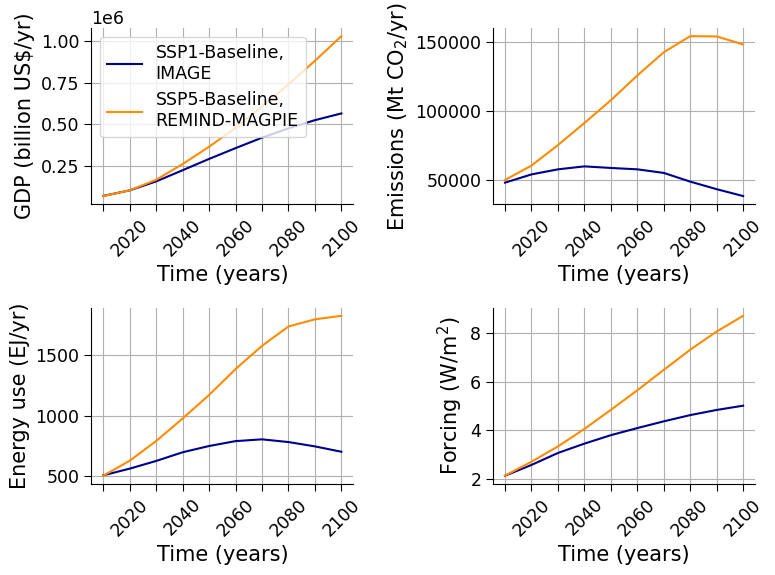

In [12]:
# put variables of interest in a list
vars = ['GDP|PPP','Emissions|Kyoto Gases', 'Primary Energy','Diagnostics|MAGICC6|Forcing']
# create new names for structured data series and axes labels
val_name = ['GDP (billion US$/yr)', 'Emissions (Mt CO$_2$/yr)',  'Energy use (EJ/yr)', 'Forcing (W/m$^2$)']
# choose scenarios of interest and a color for plotting
scenarios = ['SSP1-Baseline', 'SSP5-Baseline']
colors = ['darkblue','darkorange']

# init figure and axis
fig, axs = plt.subplots(2,2)
# loop over all variables and new names
for var, val, ax in zip(vars,val_name, axs.flatten()):

    # loop over scenarios and their color
    for sc, col in zip(scenarios, colors):
        # retrieve SSP for the respective variable from rich data frame
        ds_unstrct = get_SSPs_for_variable(df,sc,var)
        # restructure dataframe for plotting
        ds_strct = pd.melt(ds_unstrct, id_vars=["MODEL"], value_vars=['2010','2020','2030','2040','2050','2060','2070','2080','2090','2100'], var_name="YEAR", value_name =val)
        #print(ds_strct)
        # plot variable vs. time, add label incl. scenario and model
        ax.plot(ds_strct['YEAR'],ds_strct[val],label=f'{sc},\n{ds_strct.MODEL[0]}', color=col)
        # altern. plotting procedure w/o the color distinction
        #sns.lineplot(ds_strct, x='YEAR', y=val, hue='MODEL', ax=ax, palette='flare')

    # aesthetics
    ax.set_ylabel(fr'{val}')
    ax.set_xlabel('Time (years)')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.setp(ax.get_xticklabels()[::2], visible=False)
    ax.grid(True)
    axs[0,0].legend()

The projections in the plots you just created show changes in **GDP** (billion US\$/yr), **fossil fuel emissions** (Mt CO$_2$/yr), **energy use** (EJ/yr), and **forcing** (W/m$^2$) across the two very different scenarios SSP1 and SSP5, computed at their baseline forcing level, which are each represented by a distinct color in each plot.

Our plots show that the SSP5-Baseline scenario exhibits very high levels of energy use, and emissions (due to fossil fuel exploitation), it marks the upper end of the scenarios in several dimensions (cf. [Kriegler et al. (2014)](https://doi.org/10.1016/j.gloenvcha.2016.05.015)).

The SSP1-Baseline scenario contrarily caps the increase of energy use by 2030, combined with other actions leading to decreasing emissions and subsequently a decreasing forcing for the second half of the century. However, economic growth continues with half the slope of SSP5-Baseline. In summary, it is the most optimistic projection: we transition to a global society of sustainability-focused growth.

## Section 1.1: SSP Creation via IAMs

The underlying modeling of Integrated Assessment Models (IAMs) works roughly as follows:

All SSP projections are created by optimizing economic activity within the constraint of a given level of greenhouse gas forcing at 2100 (bottom right in the above plot). This activity drives distinct temperature changes via the emissions it produces (top right), which are inputted into a damage function to compute economic damages. These damages feedback into the economy model to limit emissions-producing economic activity (top left).
*Note that we already explored these damage functions along our En-ROADS climate solution simulator in Tutorial 2*.

The forcing constraint ensures the amount of emissions produced is consistent for that particular scenario. In other words, the projected temperature change under different scenarios is fed to a socioeconomic model component in order to assess the socioeconomic impacts resulting from the temperature change associated with each SSP. *For examples of such impacts check out today's Tutorial 2 and W2D4.*

Not every variable in IAMs is endogenous (i.e. determined by other variables in the model). Some variables, like population or technology growth, are exogenous (i.e. variables whose time course is given to the model). In this case, the time course of, e.g., population and economic growth, are derived from simple growth models. These exogenous variables are assumed to be under our society's control (e.g. via mitigation).

To understand how our plotted scenarios compare with all other scenarios, we first have a look at the underlying policy assumptions.

## Section 1.2 Shared Climate Policy Assumptions (SPAs)

All pathways have common Shared Climate Policy Assumptions (SPAs) like
- limits to how fast we can respond based on where we are now,
- what kinds of policies can be implemented, and how

which constrain the modelers that create scenarios and their narratives.

Our example scenarios hence share the above SPAs and vary in their narrative:

In the hypothetical world of SSP5, no climate policies or climate impacts exist, which in other words effectively implies that the carbon price is zero (cf. [Ch.3.2.1.1 of IPCC's report on 'Climate Change 2022: Mitigation of Climate Change')](https://www.ipcc.ch/report/ar6/wg3/downloads/report/IPCC_AR6_WGIII_Chapter03.pdf).


## Section 1.3: Similarities of SSP1 and SSP5

When you compare the two scenarios, in particular, the evolution of the population and the GDP shows how similar these scenarios are in their optimistic view on the development of humanity. We all learn to get along, both within and across countries and more equal development naturally stems from population growth through well-known mechanisms like access to conception. The following figure emphasizes this.

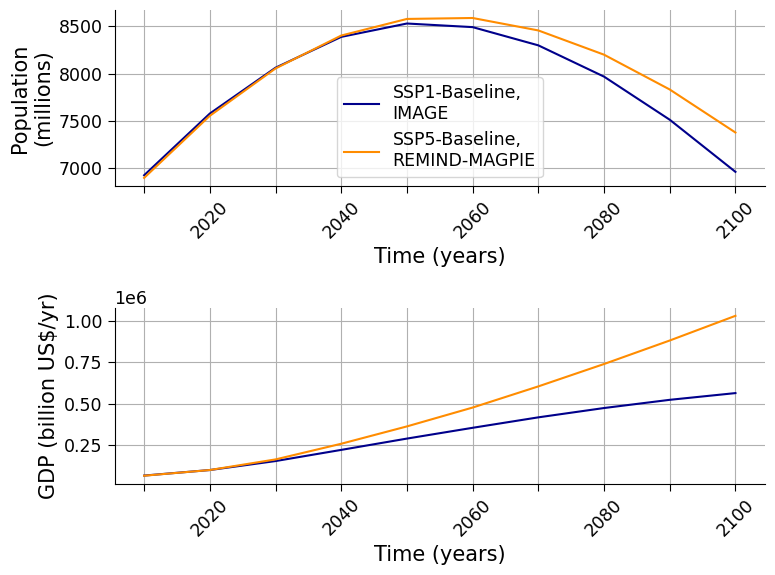

In [13]:
# put variables of interest in a list
vars = ['Population', 'GDP|PPP']
# create new names for structured data series and plot labels
val_name = ['Population\n(millions)', 'GDP (billion US$/yr)']
# choose scenarios of interest and a color for plotting
scenarios = ['SSP1-Baseline', 'SSP5-Baseline']
colors = ['darkblue','darkorange']

# init figure and axis
fig, axs = plt.subplots(2,1)
# loop over all variables and new names
for var, val, ax in zip(vars,val_name, axs.flatten()):

    # loop over scenarios and their color
    for sc, col in zip(scenarios, colors):
        # retrieve SSP for the respective variable from rich dataframe
        ds_unstrct = get_SSPs_for_variable(df,sc,var)
        # restructure dataframe for plotting
        ds_strct = pd.melt(ds_unstrct, id_vars=["MODEL"], value_vars=['2010','2020','2030','2040','2050','2060','2070','2080','2090','2100'], var_name="YEAR", value_name =val)
        #print(ds_strct)
        # plot variable vs. time, add label incl. scenario and model
        ax.plot(ds_strct['YEAR'],ds_strct[val],label=f'{sc},\n{ds_strct.MODEL[0]}', color=col)
        # altern. plotting procedure w/o the color distinction
        #sns.lineplot(ds_strct, x='YEAR', y=val, hue='MODEL', ax=ax, palette='flare')

    # aesthetics
    ax.set_ylabel(fr'{val}')
    ax.set_xlabel('Time (years)')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.setp(ax.get_xticklabels()[::2], visible=False)
    ax.grid(True)
    axs[0].legend()

Both GDP and population increase.

## Section 1.4: Differences of SSP1 and SSP5

Major differences are visible when you contrast emissions and assume direct causation with ecosystem health. Increasing emissions then translate into decreasing ecosystem health.

## Coding exercise 1.4

1. Choose two variables to emphasize ecosystem health differences in the SSP1 and SSP5 scenarios and assign them to `vars`. Then assign axis labels with the correct units for plotting to the `val_name` variable.
2. Explain to your pod why the chosen variables emphasize a difference in the scenarios and describe this difference based on your current knowledge of the narratives.

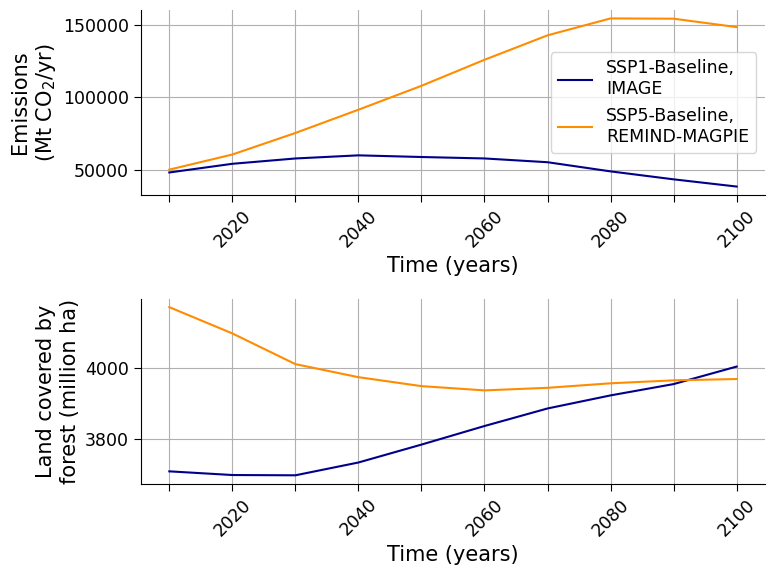

In [15]:
# put two variables of interest in a list
vars = ['Emissions|Kyoto Gases', 'Land Cover|Forest']
# create new names for structured data series and plot labels
val_name = ['Emissions\n(Mt CO$_2$/yr)','Land covered by\nforest (million ha)']
# choose scenarios of interest and a color for plotting
scenarios = ['SSP1-Baseline', 'SSP5-Baseline']
colors = ['darkblue','darkorange']


# init figure and axis
fig, axs = plt.subplots(2,1)
# loop over all variables and new names
for var, val, ax in zip(vars,val_name, axs.flatten()):

    # loop over scenarios and their color
    for sc, col in zip(scenarios, colors):
        # retrieve SSP for the respective variable from rich dataframe
        ds_unstrct = get_SSPs_for_variable(df,sc,var)
        # restructure dataframe for plotting
        ds_strct = pd.melt(ds_unstrct, id_vars=["MODEL"], value_vars=['2010','2020','2030','2040','2050','2060','2070','2080','2090','2100'], var_name="YEAR", value_name =val)
        #print(ds_strct)
        # plot variable vs. time, add label incl. scenario and model
        ax.plot(ds_strct['YEAR'],ds_strct[val],label=f'{sc},\n{ds_strct.MODEL[0]}', color=col)
        # altern. plotting procedure w/o the color distinction
        #sns.lineplot(ds_strct, x='YEAR', y=val, hue='MODEL', ax=ax, palette='flare')

    # aesthetics
    ax.set_ylabel(fr'{val}')
    ax.set_xlabel('Time (years)')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.setp(ax.get_xticklabels()[::2], visible=False)
    ax.grid(True)
    axs[0].legend()

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D2_TheSocioeconomicsofClimateChange/solutions/W2D2_Tutorial4_Solution_26753443.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D2_TheSocioeconomicsofClimateChange/static/W2D2_Tutorial4_Solution_26753443_0.png>



[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D2_TheSocioeconomicsofClimateChange/solutions/W2D2_Tutorial4_Solution_4240ed7b.py)



In [16]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1_4")

# Summary
In this tutorial, you've gained a first understanding of the Shared Socioeconomic Pathways and their creation, the application of Integrated Assessment Models in climate economics. You've learned how SSPs share policy assumptions. Furthermore, you compared SSP1 and SSP5 with respect to their view on the development of humanity and their ecosystem health.

In the next tutorial, you dissect and analyze the SSP narratives in more detail.

# Resources

It is possible to download the SSP data used in this tutorial, when you provide an email address, from [this IIASA database](https://tntcat.iiasa.ac.at/SspDb/dsd), where all data from the main simulations of the IAMs used in the [IPCC reports](https://www.ipcc.ch/reports/) is freely available.

Find a summary of all SSP narratives in this paper by [O'Neill et al. (2017)](https://doi.org/10.1016/j.gloenvcha.2015.01.004).

Find even more information in

- [IIASA's introduction to SSPs](https://iiasa.ac.at/models-tools-data/ssp)